In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import collections
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data=pd.read_csv('/drive/My Drive/Datasets/orders8.csv')

In [ ]:
data.head()

,orderId,itemId,Quantity,Name,catId,catName
0,1,11,1,Garden Fresh Pizza,27,Pizza
1,2,31,1,Garden Fresh Pizza Cone,28,Pizza Cones
2,2,32,1,Chicken Tikka Pizza Cone,28,Pizza Cones
3,2,87,5,BBQ Cottage Cheese,28,Pizza Cones
4,7,85,1,Tandoori Chicken,27,Pizza


In [ ]:
data.shape

(12284, 6)

In [ ]:
data['Name']=data['Name'].str.strip()

In [ ]:
data['catId']=data['catId'].astype('str')

In [ ]:
basket = (data.groupby(['orderId','Name'])['Quantity'].sum().unstack().fillna(0))

In [ ]:
basket.head()

Name,7UP,All Meat Extravaganza,BBQ Cottage Cheese,Brownie,Carry Bag,Cheese Chicken Pasta,Cheese Garlic Bread,Cheese Sticks,Cheesy Chicken Pasta,Cheesy Veggi Pasta,...,Super Cheese,Supreme Combo,Tandoori Chicken,Veg Feast Pizza,Veg Kolhapuri Pizza,Veg Supreme Pizza,Veggie Lovers Pizza,Water Bottle,Water Bottle 1,garden fresh
orderId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

In [ ]:
basket_sets=basket.applymap(encode_units)

In [ ]:
basket_sets.head()

Name,7UP,All Meat Extravaganza,BBQ Cottage Cheese,Brownie,Carry Bag,Cheese Chicken Pasta,Cheese Garlic Bread,Cheese Sticks,Cheesy Chicken Pasta,Cheesy Veggi Pasta,...,Super Cheese,Supreme Combo,Tandoori Chicken,Veg Feast Pizza,Veg Kolhapuri Pizza,Veg Supreme Pizza,Veggie Lovers Pizza,Water Bottle,Water Bottle 1,garden fresh
orderId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_sets['Brownie'] 

orderId
1        0
2        0
7        0
11       0
14       0
        ..
10864    0
10866    0
10868    0
10869    0
10872    0
Name: Brownie, Length: 4751, dtype: int64

In [ ]:
frequent_itemsets=apriori(basket_sets, min_support=0.001,use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.024205,(7UP)
1,0.010735,(All Meat Extravaganza)
2,0.022522,(BBQ Cottage Cheese)
3,0.003789,(Brownie)
4,0.011156,(Carry Bag)
...,...,...
589,0.001052,"(Cheese Garlic Bread, French Fries, Veggie Lov..."
590,0.001052,"(Margherita Pizza, French Fries, Chicken Delig..."
591,0.001263,"(Margherita Pizza, Chicken Fingers(Boneless), ..."
592,0.001052,"(French Fries, Margherita Pizza, Lava Cake, Pe..."


In [ ]:
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(7UP),(Cheesy Veggie Pasta),0.024205,0.049042,0.001263,0.052174,1.063855,0.000076,1.003304
1,(Cheesy Veggie Pasta),(7UP),0.049042,0.024205,0.001263,0.025751,1.063855,0.000076,1.001586
2,(7UP),(Garden Fresh Pizza Cone),0.024205,0.020206,0.001052,0.043478,2.151721,0.000563,1.024330
3,(Garden Fresh Pizza Cone),(7UP),0.020206,0.024205,0.001052,0.052083,2.151721,0.000563,1.029410
4,(7UP),(Miranda),0.024205,0.018943,0.002315,0.095652,5.049372,0.001857,1.084822
...,...,...,...,...,...,...,...,...,...
811,"(Margherita Pizza, Pepsi 1)","(Water Bottle 1, French Fries)",0.071985,0.013681,0.001052,0.014620,1.068601,0.000068,1.000952
812,"(French Fries, Pepsi 1)","(Water Bottle 1, Margherita Pizza)",0.081667,0.009472,0.001052,0.012887,1.360538,0.000279,1.003459
813,(Water Bottle 1),"(Margherita Pizza, French Fries, Pepsi 1)",0.063355,0.013892,0.001052,0.016611,1.195762,0.000172,1.002765
814,(French Fries),"(Water Bottle 1, Margherita Pizza, Pepsi 1)",0.311724,0.002947,0.001052,0.003376,1.145703,0.000134,1.000431


In [ ]:
rules.drop(['leverage', 'conviction', 'antecedent support', 'consequent support'], axis=1, inplace=True)

In [ ]:
0.000842/(0.024205*0.003789)

9.180839587780303

In [ ]:
rules.drop_duplicates(subset=['lift','support'],keep='first').head()

,antecedents,consequents,support,confidence,lift
0,(7UP),(Cheesy Veggie Pasta),0.001263,0.052174,1.063855
2,(7UP),(Garden Fresh Pizza Cone),0.001052,0.043478,2.151721
4,(7UP),(Miranda),0.002315,0.095652,5.049372
6,(7UP),(Mountain Dew),0.001052,0.043478,4.490548
8,(7UP),(Panner Tandoori Pizza),0.001894,0.078261,1.215090


In [ ]:
x=rules
x.drop(['support', 'confidence'], axis=1, inplace=True)

In [ ]:
x

,antecedents,consequents,lift
0,(7UP),(Cheesy Veggie Pasta),1.063855
1,(Cheesy Veggie Pasta),(7UP),1.063855
2,(7UP),(Garden Fresh Pizza Cone),2.151721
3,(Garden Fresh Pizza Cone),(7UP),2.151721
4,(7UP),(Miranda),5.049372
...,...,...,...
811,"(Margherita Pizza, Pepsi 1)","(Water Bottle 1, French Fries)",1.068601
812,"(French Fries, Pepsi 1)","(Water Bottle 1, Margherita Pizza)",1.360538
813,(Water Bottle 1),"(Margherita Pizza, French Fries, Pepsi 1)",1.195762
814,(French Fries),"(Water Bottle 1, Margherita Pizza, Pepsi 1)",1.145703


In [ ]:
user_list=[]
col=collections.OrderedDict()

In [ ]:
col['Message']=str('item Data')
col['Result']=str('Success')

In [ ]:
col

OrderedDict([('Message', 'item Data'), ('Result', 'Success')])

In [ ]:
combos_list=[]
datatuple=rules.itertuples(index=False)

In [ ]:
print(datatuple)

In [ ]:
for item in datatuple:
  t=collections.OrderedDict()
  t['item1']=[i for i in item[0]]
  t['item2']=[i for i in item[1]]
  t['support']= item[2]
  t['confidence'] = item[3]
  t['lift'] = item[4]
  combos_list.append(t)

In [ ]:
col["items_list"] = combos_list
z=list(col.values())[2]
lift_list=[z[i]['lift'] for i in range(len(z))]
combi=[z[i]['item1'] + z[i]['item2'] for i in range(len(z))]
lift_list=[round(i,10) for i in lift_list]
zip_combo=list(zip(combi,lift_list))
df = pd.DataFrame(zip_combo, columns=['items','lift values'])
df=df.drop_duplicates(subset='lift values',keep='first')
combi=df['items'].tolist()
lift_list=df['lift values'].tolist()

In [ ]:
combos2=[]
combos3=[]
combos4=[]
lift_list2=[]
lift_list3=[]
lift_list4=[]

In [ ]:
for i in range(len(combi)):
  if len(combi[i])==2 :
    combos2.append(combi[i])
    lift_list2.append(lift_list[i])
  elif len(combi[i])==3:
    combos3.append(combi[i])
    lift_list3.append(lift_list[i])
  else:
    combos4.append(combi[i])
    lift_list4.append(lift_list[i])

In [ ]:
def combos_2(combos2,lift_list2):
  dff = pd.DataFrame(combos2)
  dff = pd.DataFrame({'item1 and item2': combos2,'lift values': lift_list2,})
  dff.sort_values("lift values", axis = 0, ascending = False,
                  inplace = True, na_position ='last')
  lenlist_2 = list(range(len(combos2)))
  dff['list']= lenlist_2
  df2=dff.head(5)
  print(df2)
  df2.plot(kind = 'bar',x = 'list',y = 'lift values',color = 'red')

In [ ]:
def combos_3(combos3,lift_list3):
  df3 = pd.DataFrame(combos3)
  df3 = pd.DataFrame({'item1 and item2': combos3,'lift values': lift_list3,})
  df3.sort_values("lift values", axis = 0, ascending = False,
                        inplace = True, na_position ='last')
  df3['list'] = list(range(len(combos3)))
  df3=df3.head()
  print(df3)
  df3.plot(kind = 'bar',x = 'list',y = 'lift values',color = 'blue')

In [ ]:
def combos_4(combos4,lift_list4):    
  df4 = pd.DataFrame(combos4)
  df4 = pd.DataFrame({'item1 and item2': combos4,'lift values': lift_list4,})
  df4.sort_values("lift values", axis = 0, ascending = False,
                  inplace = True, na_position ='last')
  df4['list'] = list(range(len(combos4)))
  df4=df4.head()
  print(df4)
  df4.plot(kind = 'bar',x = 'list',y = 'lift values',color = 'green')

                                       item1 and item2  lift values  list
23                           [Meal For 4 Veg, Brownie]    52.788889     0
22                 [Brownie, Chicken Tikka Pizza Cone]    30.288707     1
86          [Meal For 4 Veg, Chicken Tikka Pizza Cone]    15.577049     2
84   [Garden Fresh Pizza Cone, Chicken Tikka Pizza ...     8.113046     3
132                            [Miranda, Mountain Dew]     8.033092     4


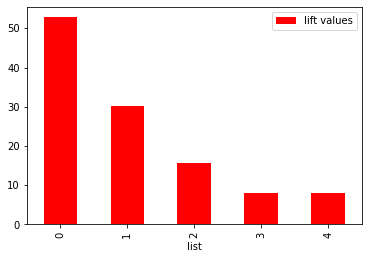

In [ ]:
combos_2(combos2,lift_list2)

                                       item1 and item2  lift values  list
162          [Super Cheese, Pepsi 1, Hot Chilli Pizza]     5.869780     0
53           [Cheese Sticks, Pepsi 1, Chicken Supreme]     4.570467     1
15    [Pepsi 1, Cheese Chicken Pasta, Grilled Chicken]     4.529939     2
56   [Garden Fresh Pizza Cone, Pepsi 1, Cheese Sticks]     4.328535     3
121            [French Fries, Pepsi, Hot Chilli Pizza]     4.289455     4


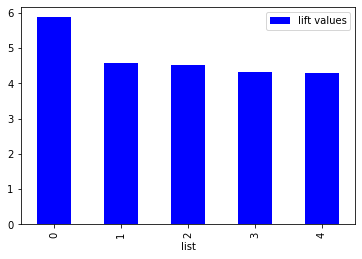

In [ ]:
combos_3(combos3,lift_list3)

                                      item1 and item2  lift values  list
13  [Margherita Pizza, Chicken Fingers(Boneless), ...     3.194307     0
5   [French Fries, Cheese Garlic Bread, Pepsi 1, V...     2.815908     1
7   [French Fries, Cheese Garlic Bread, Veggie Lov...     2.423980     2
6   [French Fries, Veggie Lovers Pizza, Pepsi 1, C...     2.246548     3
12  [Margherita Pizza, French Fries, Pepsi 1, Chic...     2.159545     4


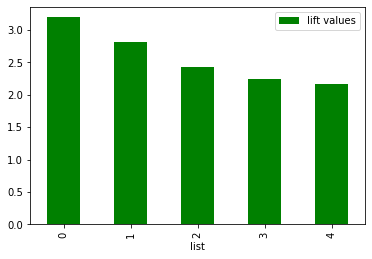

In [ ]:
combos_4(combos4,lift_list4)